In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
# Create the dataset
data = {
    "Weather": ["Sunny", "Sunny", "Cloudy", "Rainy", "Sunny", "Cloudy", "Sunny", "Cloudy", "Sunny", "Rainy"],
    "Temperature (°C)": [30, 28, 22, 18, 26, 23, 35, 20, 24, 17],
    "Time of Day": ["Morning", "Afternoon", "Evening", "Morning", "Afternoon", "Morning", "Evening", "Morning", "Afternoon", "Evening"],
    "Humidity": ["Low", "Medium", "High", "Medium", "Low", "Medium", "Low", "Low", "High", "High"],
    "Wind Speed": ["Low", "Medium", "Low", "Low", "High", "Low", "Medium", "Low", "Low", "High"],
    "Day of the Week": ["Weekend", "Weekday", "Weekend", "Weekday", "Weekend", "Weekday", "Weekend", "Weekday", "Weekend", "Weekday"],
    "Go for Walk (Yes/No)": ["Yes", "No", "No", "No", "No", "No", "Yes", "Yes", "No", "No"]
}

In [3]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [4]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le


In [5]:
# Separate features and target
X = df.drop("Go for Walk (Yes/No)", axis=1)
y = df["Go for Walk (Yes/No)"]


In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Train the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Make predictions
y_pred = dt.predict(X_test)


In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



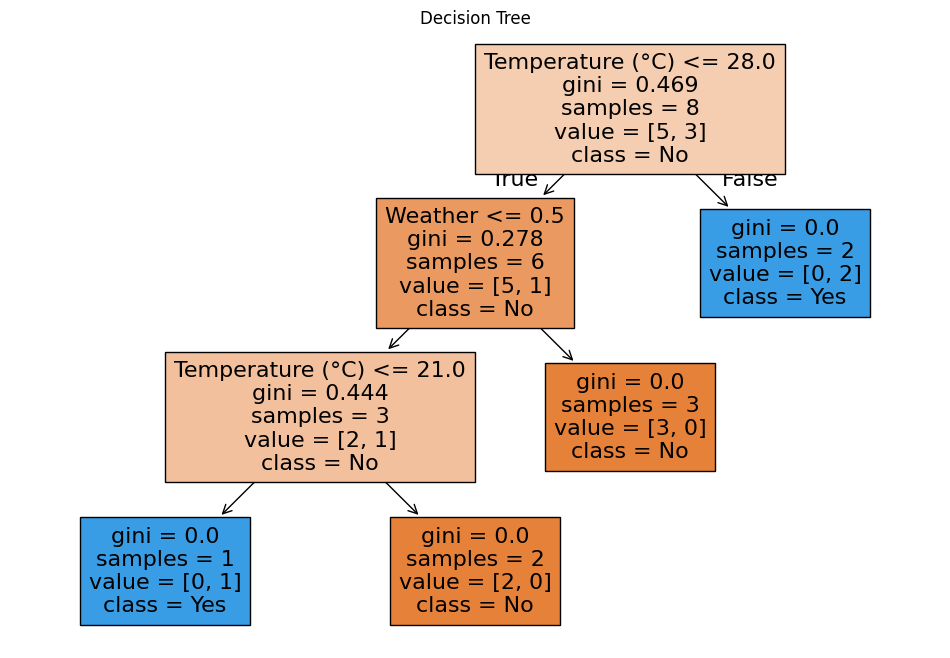

In [10]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=label_encoders["Go for Walk (Yes/No)"].classes_, filled=True)
plt.title("Decision Tree")
plt.show()